## Importing the library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Data

In [6]:
data=pd.read_csv('global_heat_index.csv')
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [8]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


In [9]:
data.isnull().sum()

Year                     0
Month                    0
Day                      0
Hour                     0
Dew Point                0
Temperature              0
Pressure                 0
Relative Humidity        0
Wind Direction           0
Wind Speed               0
Solar Radiation (GHI)    0
dtype: int64

In [10]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Wind Direction', 'Wind Speed',
       'Solar Radiation (GHI)'],
      dtype='object')

In [11]:
data[data['Solar Radiation (GHI)']==0]['Hour'].value_counts()

0     730
1     730
2     730
3     730
4     730
5     730
19    730
20    730
21    730
22    730
23    730
6     409
18    317
7      73
8       1
15      1
Name: Hour, dtype: int64

## Cleaning Data

In [12]:
clean1=data[data['Hour']<6]
clean2=data[data['Hour']>18]

In [13]:
print("Cleaning Data from 12:00 am to 5:59 am")
clean1.head()

Cleaning Data from 12:00 am to 5:59 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [14]:
print("Cleaning Data from 18:00 pm to  12.00 am")
clean2.head()

Cleaning Data from 18:00 pm to  12.00 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0


In [15]:
data.drop(clean1.index,axis=0,inplace=True)
data.drop(clean2.index,axis=0,inplace=True)

In [16]:
data.head(10)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698
13,2011,1,1,13,2,22.256216,985.736511,27.274695,5.355347,1.747909,675
14,2011,1,1,14,2,21.725884,985.521545,27.819289,6.877182,2.005287,582
15,2011,1,1,15,2,20.507269,985.279663,30.023284,10.448921,2.206879,430


In [17]:
data.shape

(9490, 11)

## Input and Output Data

In [18]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [19]:
X.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695


In [20]:
Y.head()

6       0
7       0
8     159
9     363
10    533
Name: Solar Radiation (GHI), dtype: int64

In [21]:
from sklearn.preprocessing import MinMaxScaler
X=pd.DataFrame(MinMaxScaler().fit(X).transform(X))

In [22]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.000000,0.545455,0.058249,0.751583,0.667870,0.266273,0.245979
1,0.0,0.0,0.0,0.083333,0.545455,0.084360,0.779201,0.637009,0.292294,0.218438
2,0.0,0.0,0.0,0.166667,0.563636,0.150650,0.809220,0.546880,0.314862,0.194155
3,0.0,0.0,0.0,0.250000,0.563636,0.210254,0.820218,0.466754,0.326007,0.142382
4,0.0,0.0,0.0,0.333333,0.563636,0.294994,0.814713,0.361586,0.201380,0.071046


## Correlation Matrix Heat Map

In [23]:
corr_matrix=data.corr()

In [24]:
corr_matrix

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
Year,1.000000e+00,-1.206348e-12,-7.235267e-14,-1.408221e-15,-0.139773,0.026887,0.020252,-0.166373,0.011996,0.037455,-0.013891
Month,-1.206348e-12,1.000000e+00,1.189318e-02,2.332832e-15,0.491577,-0.038576,-0.036657,0.460993,-0.102648,-0.216902,-0.090227
Day,-7.235267e-14,1.189318e-02,1.000000e+00,2.843627e-17,-0.017772,-0.011873,0.046708,-0.005074,-0.021712,0.038542,0.011420
Hour,-1.408221e-15,2.332832e-15,2.843627e-17,1.000000e+00,-0.020686,0.269499,-0.183460,-0.211869,0.113641,0.006593,0.040573
Dew Point,-1.397731e-01,4.915774e-01,-1.777210e-02,-2.068626e-02,1.000000,0.198330,-0.587488,0.790023,0.160133,0.072254,-0.024650
Temperature,2.688710e-02,-3.857553e-02,-1.187262e-02,2.694991e-01,0.198330,1.000000,-0.627170,-0.344609,0.431627,0.263510,0.608713
Pressure,2.025241e-02,-3.665724e-02,4.670753e-02,-1.834597e-01,-0.587488,-0.627170,1.000000,-0.244693,-0.428785,-0.435057,-0.144057
Relative Humidity,-1.663735e-01,4.609927e-01,-5.073932e-03,-2.118687e-01,0.790023,-0.344609,-0.244693,1.000000,-0.053618,-0.107921,-0.371410
Wind Direction,1.199631e-02,-1.026477e-01,-2.171216e-02,1.136411e-01,0.160133,0.431627,-0.428785,-0.053618,1.000000,0.207285,0.168475
Wind Speed,3.745498e-02,-2.169017e-01,3.854214e-02,6.593433e-03,0.072254,0.263510,-0.435057,-0.107921,0.207285,1.000000,0.007935


<Axes: >

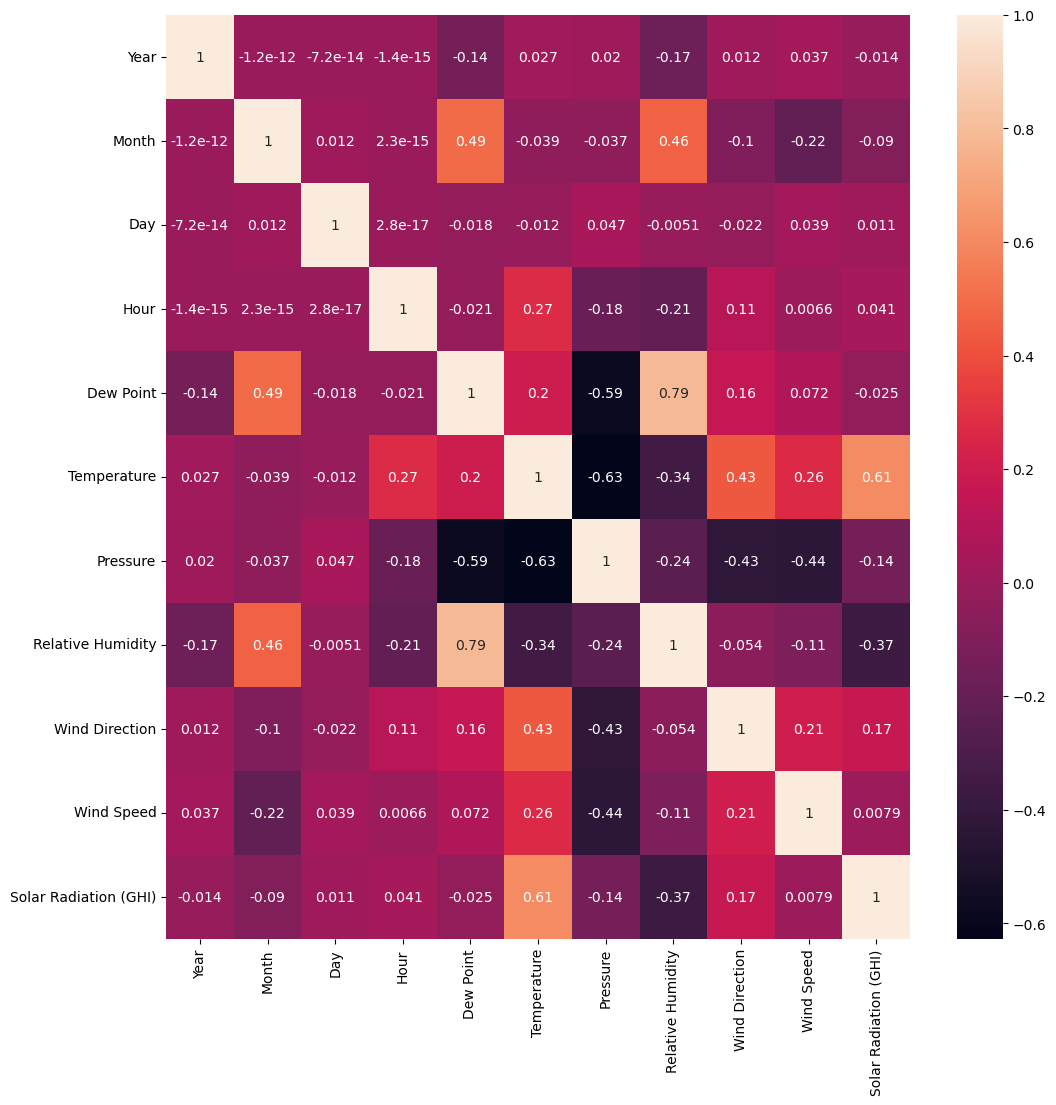

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

## Extra Tree Classifier

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [31]:
col = ['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Wind Direction', 'Wind Speed',]
imp_feature=pd.Series(model.feature_importances_,index=col)

In [32]:
imp_feature

Year                 0.026869
Month                0.042955
Day                  0.109457
Hour                 0.111286
Dew Point            0.088678
Temperature          0.139481
Pressure             0.123964
Relative Humidity    0.123209
Wind Direction       0.117065
Wind Speed           0.117036
dtype: float64

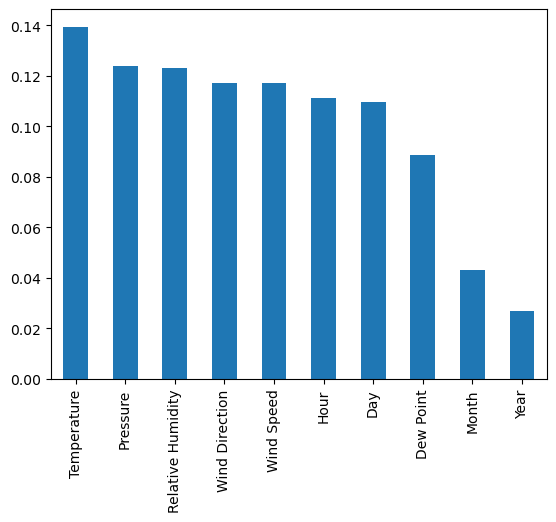

In [35]:
imp_feature.nlargest(10).plot(kind='bar')
plt.show()


# Select K Best Method

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
bestFeatures=SelectKBest(score_func=chi2,k=10).fit(X,Y)

In [54]:
df1=pd.DataFrame(bestFeatures.scores_)
df2=pd.DataFrame(col)
df=pd.concat([df1,df2],axis=1)


In [57]:
df.columns=['Scores','Features']

In [58]:
df

,Scores,Features
0,504.976721,Year
1,236.303859,Month
2,208.497847,Day
3,271.978728,Hour
4,74.952667,Dew Point
5,306.062548,Temperature
6,213.040872,Pressure
7,397.828591,Relative Humidity
8,221.823327,Wind Direction
9,148.735716,Wind Speed


<Axes: >

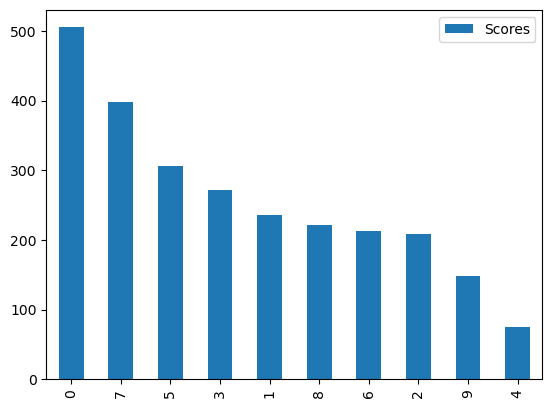

In [61]:
df.nlargest(10,'Scores').plot(kind='bar')